# Miller Regression Final

**Author:** Dan Miller

**Date:** November 19th, 2025

**Objective:** Successfully create a linear regression model with a pipeline to accurately predict insurance costs from the Kaggle Medical Cost Personal dataset.

## Introduction

This project explores the Kaggle Medical Cost Personal dataset.  The dataset contains both numerical and categorical data that describe an individual, and we want to be able to predict, based off of certain input features, that indivual's medical costs billed by health insurance.  After exploring the dataset, input features will be chosen and a linear regression model will be made.  After the original model is made, pipelines will be implemented and a comparison of the models' performances will shown and discussed.

## Imports

In [360]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Section 1. Import and Inspect the Data

### 1.1 Load the Data

In [361]:
file_path = "data/insurance.csv"

# Load the dataset
insurance = pd.read_csv(file_path)

# Display the first ten rows
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for Missing Values and Display Summary Statistics

In [362]:
# Display data types
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [363]:
# Display summary statistics
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [364]:
# Identify missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Reflection 1:

1) What do you notice about the dataset?  **The dataset consists of both numerical and categorical data, with only 7 features total.  There are no missing values.**

2) Are there any data issues?  **There doesn't seem to be any initial issues with the data.**

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

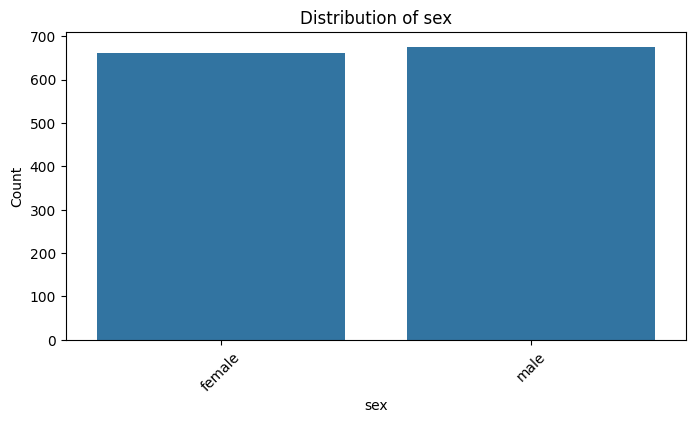

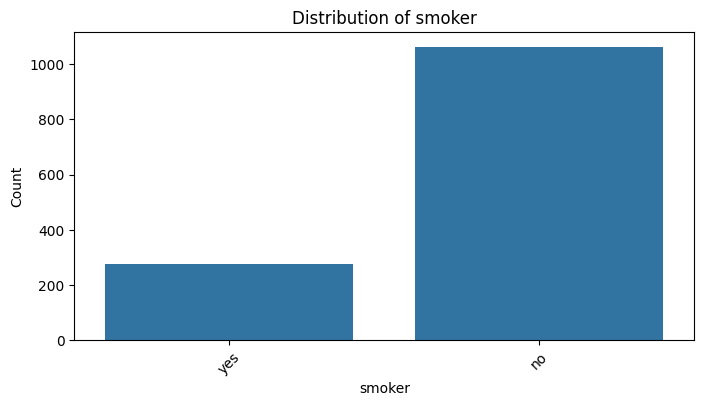

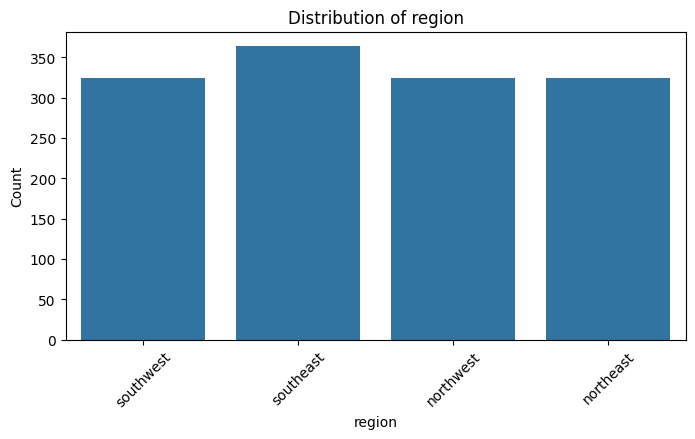

In [365]:
# Create histograms for categorical features
categorical_features = ["sex", "smoker", "region"]
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=insurance, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

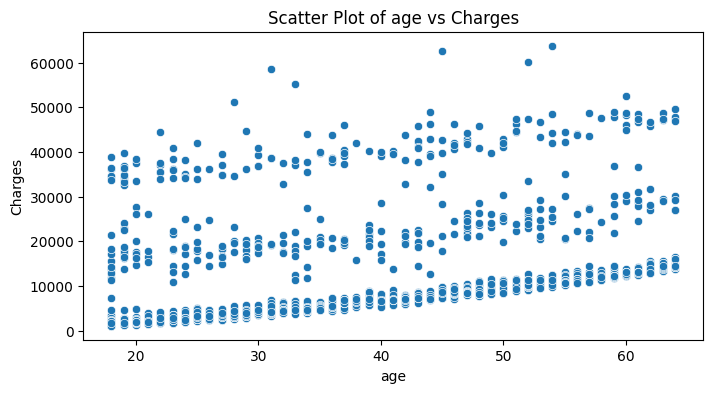

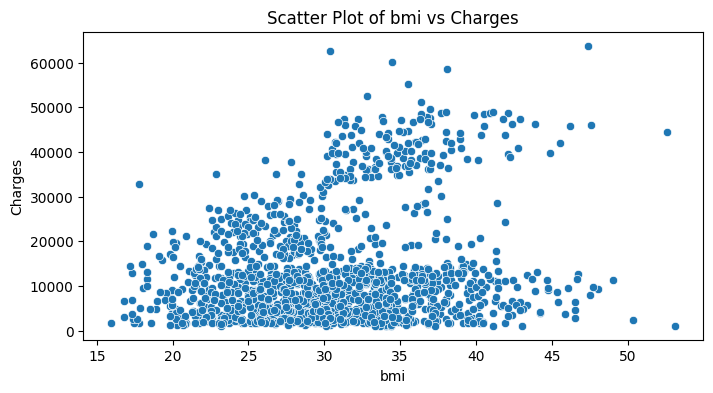

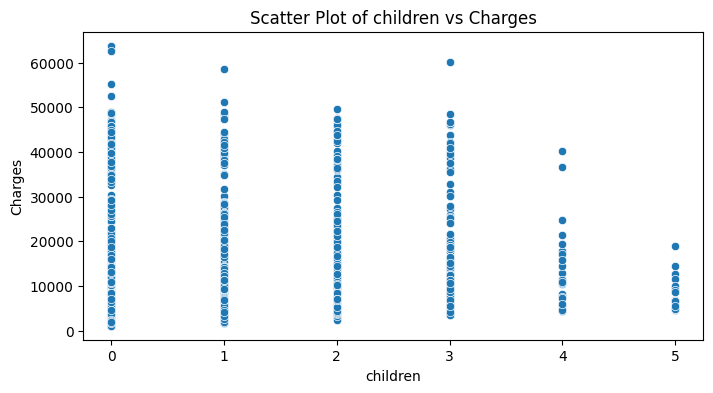

In [366]:
# Create scatter plots for numerical features
numerical_features = ["age", "bmi", "children"]
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=insurance, x=feature, y="charges")
    plt.title(f"Scatter Plot of {feature} vs Charges")
    plt.xlabel(feature)
    plt.ylabel("Charges")
    plt.show()

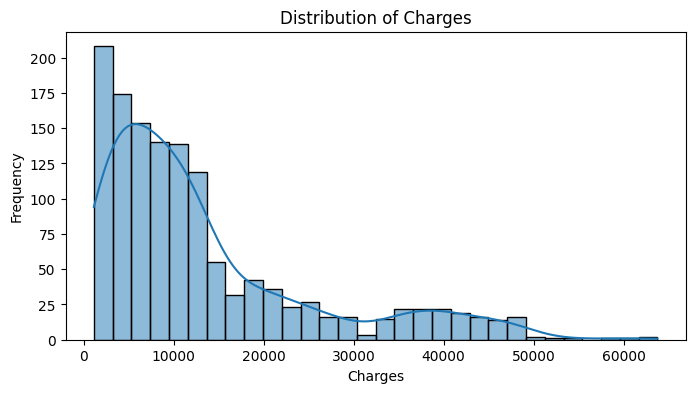

In [367]:
# Plot charges
plt.figure(figsize=(8, 4))
sns.histplot(insurance["charges"], bins=30, kde=True)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

### 2.2 Handle Missing Values and Clean Data

In [368]:
# Convert categorical data to numeric

insurance["sex"] = insurance["sex"].map({"male": 0, "female": 1})
insurance["smoker"] = insurance["smoker"].map({"no": 0, "yes": 1})

### 2.3 Feature Engineering

In [369]:
# Log-transform the target variable
insurance["log_charges"] = np.log(insurance["charges"])

# Create new features
insurance["smoker_age"] = insurance["smoker"] * insurance["age"]

insurance["bmi_squared"] = insurance["bmi"] ** 2

### Reflection 2:

1) What patterns or anomalies do you see?  **The target variable is right-skewed.  There is an increase in price with age, and a decrease in price with more children.  Region seems to be almost uniform.**

2) Do any features stand out?  **Age stands out the most to me, as it has a clear positive relationship with charges.**

3) What preprocessing steps were necessary to clean and improve the data?  **I didn't have to deal with missing values because there aren't any, but since the model is linear regression I had to convert categorical data to numeric.**

4) Did you create or modify any features to improve performance?  **First I took the log of charges because it's right-skewed.  Then I created two new features, smoker_age and bmi_squared.  We saw that age increases price, so I believe older smokers will most likely also have an impact on price.  I squared BMI because we can see in the scatter plot that when BMI gets above 30, the prices can get increased.**

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

The chosen features and target are:

Input features:
- smoker_age
- bmi_squared
- age
- smoker

Target:
- log_charges

### 3.2 Define X and y

In [370]:
# Assign features and target variable
X = insurance[["age", "smoker", "smoker_age", "bmi_squared"]]
y = insurance["log_charges"]

### Reflection 3:

1) Why did you choose these features?  **We know that age and bmi should both increase the charge as they increase from the scatter plots.  BMI is squared to improve performance.  I also added smoker_age as an interaction feature because I believe old smokers pay a higher price, and because of that I also needed to have smoker as an input feature.  I don't want to have the interaction feature without the features it's built from.**

2) How might they impact prediction or accuracy?  **I believe that they should increase accuracy.  Having four input features that I think are impactful should make the model perform well.  The data has 1,338 instances, so the model should theoretically not have any issues.  I only worry about the chance of some features being highly correlated.**

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the Data

In [371]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 4.2 Train Model

In [372]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4.3 Evaluate Performance

In [373]:
# Create helper function to print metrics
def print_metrics(y_pred, y_pred_test):
    print("Training R2:", r2_score(y_train, y_pred))
    print("Test R2:", r2_score(y_test, y_pred_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("MAE:", mean_absolute_error(y_test, y_pred_test))

# Make predictions and display R2, MAE, and RMSE

y_pred = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

print_metrics(y_pred, y_pred_test)

Training R2: 0.7697223611616482
Test R2: 0.8274290500215513
RMSE: 0.3685003651402063
MAE: 0.25642349197448605


### Reflection 4:

1) How well did the model perform?  **The model performs quite well, with an R2 score of ~0.83, that's pretty close to 1, so the model fits the data well.  MAE and RMSE being small also tells us that the model performs well.**

2) Any surprises in the results?  **I wasn't expecting the model to perform this well, I was hoping for an R2 score greater than 0.5, but it was much closer to 1 than I thought it would be.  I was a little surprised to see that the model performs better on the test data than the training, so it's good that there isn't any overfitting.**

## Section 5. Improve the Model (Implement Pipelines)

### 5.1 Implement Pipeline 1 (Imputer -> StandardScaler -> Linear Regression)

In [374]:
# Create pipeline

pipeline1 = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# Train the model
pipeline1.fit(X_train, y_train)

# Make predictions
y_pred_pipeline = pipeline1.predict(X_train)
y_pred_test_pipeline = pipeline1.predict(X_test)


### 5.2 Implement Pipeline 2 (Imputer -> Polynomial Features (degree=3) -> StandardScaler -> Linear Regression)

In [375]:
# Create pipeline

pipeline2 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# Train the model
pipeline2.fit(X_train, y_train)

# Make predictions
y_pred_pipeline2 = pipeline2.predict(X_train)
y_pred_test_pipeline2 = pipeline2.predict(X_test)

### 5.3 Compare Performances

In [376]:
# Print metrics for original model
print("Linear Regression Metrics:")
print_metrics(y_pred, y_pred_test)

print("\nPipeline 1 Metrics:")
print_metrics(y_pred_pipeline, y_pred_test_pipeline)

print("\nPipeline 2 Metrics:")
print_metrics(y_pred_pipeline2, y_pred_test_pipeline2)

Linear Regression Metrics:
Training R2: 0.7697223611616482
Test R2: 0.8274290500215513
RMSE: 0.3685003651402063
MAE: 0.25642349197448605

Pipeline 1 Metrics:
Training R2: 0.7697223611616482
Test R2: 0.827429050021533
RMSE: 0.36850036514022594
MAE: 0.25642349197450176

Pipeline 2 Metrics:
Training R2: 0.7993890177613525
Test R2: 0.857699393425185
RMSE: 0.3346242827228188
MAE: 0.2022895489164758


### Reflection 5:

1) Which models performed better?  **Pipeline 2, with the polynomial features, performed the best of all the models.  The original linear regression model and pipeline 1 performed equally well.**

2) How does scaling impact results?  **If I hadn't already altered the data (log of the target and squaring BMI), I believe scaling the features might have increased performance.  Scaling makes all the features comparable, meaning large scale features won't dominate and be given more weight.  In this case, we can see by comparing the Linear Regression model with the first pipeline (that scales the features) that scaling doesn't have any affect on performance.  The model already had stable training.**